# taq_wang_plot_comparison

#### Juan Camilo Henao Londono - 02.05.2019
#### AG Guhr - Universitaet Duisburg-Essen

File to visualy compare the results

In [1]:
# Modules

import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt

import pickle

import taq_data_tools_comp

__tau__ = 1000

In [2]:
# Self response
year = '2008'
ticker = 'AAPL'

s_aapl_juan = pickle.load(open(''.join((
                '../../../taq_data/article_reproduction_data_{1}/taq_self'
                + '_response_year_data/taq_self_response_year_data_{1}_{0}'
                + '.pickle').split())
                .format(ticker, year), 'rb'))
s_aapl_wang = np.loadtxt('../../../taq_data/article_reproduction_data_{1}/wang/{0}_{0}_{1}_RDC_L={2}.txt'.
                         format(ticker, year, __tau__), usecols=1)

In [3]:
err_s = np.abs(s_aapl_wang[1:] - s_aapl_juan) / s_aapl_wang[1:] * 100
err_avg_s = np.sum(err_s) / len(err_s)
print('The average error between the results is {:.2f}%'.format(err_avg_s))

The average error between the results is 0.00%


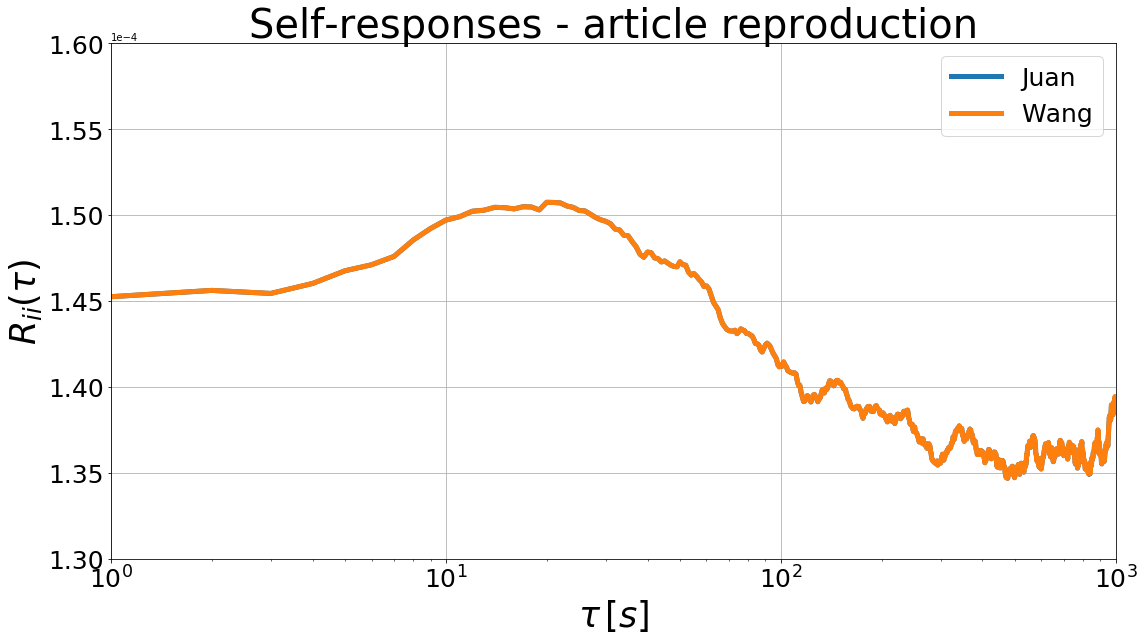

In [4]:
fig = plt.figure(figsize=(16, 9))
plt.semilogx(s_aapl_juan, linewidth=5, label='Juan')
plt.semilogx(s_aapl_wang[1:], linewidth=5, label='Wang')
plt.legend(loc='best', fontsize=25)
plt.title('Self-responses - article reproduction', fontsize=40)
plt.xlabel(r'$\tau \, [s]$', fontsize=35)
plt.ylabel(r'$R_{ii}(\tau)$', fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(1,1000)
plt.ylim(13 * 10 ** -5, 16 * 10 ** -5)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.grid(True)
plt.tight_layout()

In [5]:
# Cross response

year = '2008'
ticker_i = 'AAPL'
ticker_j = 'MSFT'

c_aapl_msft_juan = pickle.load(open(''.join((
                 '../../../taq_data/article_reproduction_data_{2}/taq_cross'
                 + '_response_year_data/taq_cross_response_year_data_{2}_{0}i'
                 + '_{1}j.pickle').split())
                 .format(ticker_i, ticker_j, year), 'rb'))

c_aapl_msft_wang = np.loadtxt('../../../taq_data/article_reproduction_data_{2}/wang/{0}_{1}_{2}_RDC_L={3}.txt'.
                         format(ticker_i, ticker_j, year, __tau__), usecols=1)

In [6]:
err_c = np.abs(c_aapl_msft_wang[1:] - c_aapl_msft_juan) / c_aapl_msft_wang[1:] * 100
err_avg_c = np.sum(err_c) / len(err_c)
print('The average error between the results is {:.2f}%'.format(err_avg_c))

The average error between the results is 0.40%


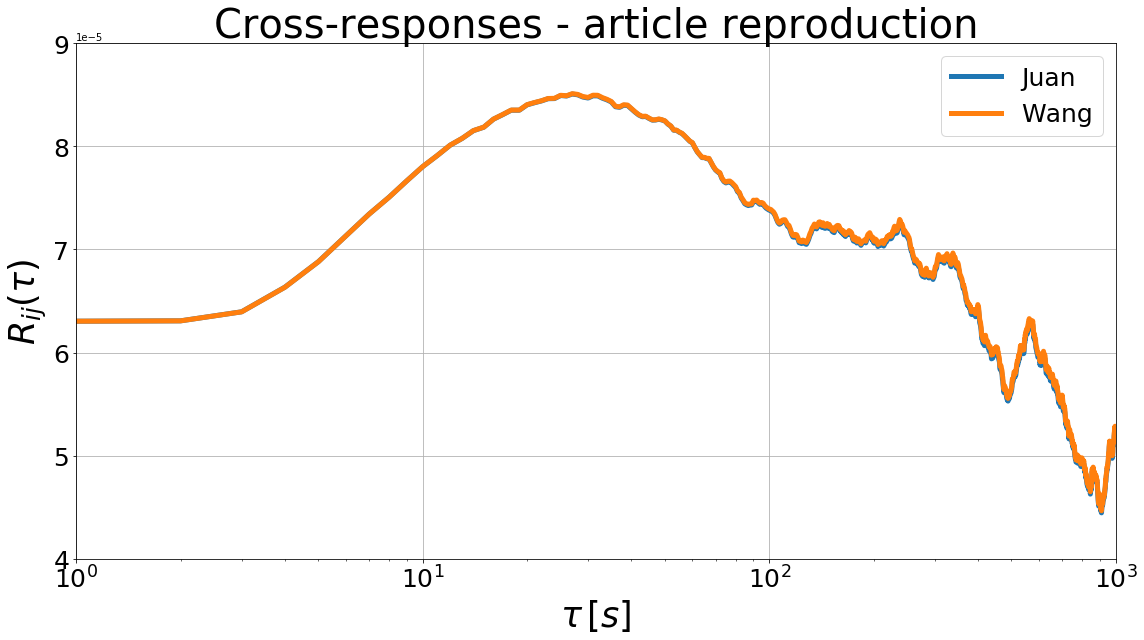

In [7]:
fig = plt.figure(figsize=(16, 9))
plt.semilogx(c_aapl_msft_juan, linewidth=5, label='Juan')
plt.semilogx(c_aapl_msft_wang[1:], linewidth=5, label='Wang')
plt.legend(loc='best', fontsize=25)
plt.title('Cross-responses - article reproduction', fontsize=40)
plt.xlabel(r'$\tau \, [s]$', fontsize=35)
plt.ylabel(r'$R_{ij}(\tau)$', fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlim(1,1000)
plt.ylim(4 * 10 ** -5, 9 * 10 ** -5)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
plt.grid(True)
plt.tight_layout()